In [0]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, load_iris


In [0]:
#Preprocess Data
boston = load_boston()
X = boston.data[:, 5:6]  
y = boston.target.reshape(506,1)
points = np.concatenate((X,y), axis=1)
y2 = boston.target

In [0]:
def train():
  learning_rate = 0.01
  initial_b = 10
  initial_m = 10
  num_iterations = 10000
  b, m = gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)
  print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error(initial_b, initial_m, points)))
  print("Running...")
  [b, m] = gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)
  print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error(b, m, points)))
  line_x = np.arange(4.,10.)
  plt.plot(X,y2, 'ro')
  plt.plot(line_x,m*line_x+b, 'r')
  plt.show()



In [0]:
def gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations):
  b = initial_b
  m = initial_m
  
  for i in range(num_iterations):
    b, m = step_gradient(b, m, points, learning_rate)
    
  return b, m

In [0]:
def step_gradient(b_current, m_current, points, learning_rate):
  b_gradient = 0
  m_gradient = 0
  N = float(len(points))
  
  for i in range(0, len(points)):
    x = points[i,0]
    y = points[i,1]
    b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
    m_gradient += -(2/N) * (y - ((m_current * x) + b_current)) * x
    
  new_b = b_current - (learning_rate * b_gradient)
  new_m = m_current - (learning_rate * m_gradient)
  
  return new_b, new_m
    
  

In [0]:
def compute_error(b, m, points):
  totalError = 0
  for i in range(0, len(points)):
    x = points[i,0]
    y = points[i,1]
    totalError += (y - (m * x + b))**2
  return totalError / float(len(points))

Starting gradient descent at b = 10, m = 10, error = 2575.449827470356
Running...
After 10000 iterations b = -30.748131964178462, m = 8.485473854101828, error = 43.79011794859675


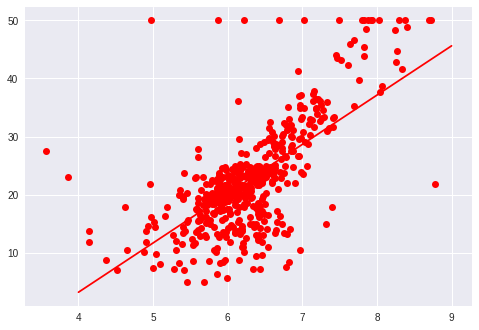

In [97]:
train()